In [10]:
import pandas as pd

NODE = [1]
LAYER = [1]
REV = [0,1,2]
APPROACH = ['CL','FL']
POISONED = [0,10,20,30,40,50]
result_path = 'results'

dt_list = []

for a in APPROACH:
    for n in NODE:
        for l in LAYER:
            for r in REV:
                exp_name = f'{a}_ModelN{n}L{l}_Batchsize1_rev{r}'
                for p in POISONED:
                    sub_f_name = f'poisoned_{p}percent'
                    
                    dt_list.append({
                        'NODE':n,
                        'LAYER':l,
                        'REV':r,
                        'APPROACH':a,
                        'EXPERIMENT':exp_name,
                        'POISONED':p,
                        'SUB_FLODER':sub_f_name,
                        'CSV':f'{result_path}\{exp_name}\{sub_f_name}\{sub_f_name}.csv',
                    })

df_exp = pd.DataFrame(dt_list)
print(df_exp.head())

   NODE  LAYER  REV APPROACH                    EXPERIMENT  POISONED  \
0     1      1    0       CL  CL_ModelN1L1_Batchsize1_rev0         0   
1     1      1    0       CL  CL_ModelN1L1_Batchsize1_rev0        10   
2     1      1    0       CL  CL_ModelN1L1_Batchsize1_rev0        20   
3     1      1    0       CL  CL_ModelN1L1_Batchsize1_rev0        30   
4     1      1    0       CL  CL_ModelN1L1_Batchsize1_rev0        40   

           SUB_FLODER                                                CSV  
0   poisoned_0percent  results\CL_ModelN1L1_Batchsize1_rev0\poisoned_...  
1  poisoned_10percent  results\CL_ModelN1L1_Batchsize1_rev0\poisoned_...  
2  poisoned_20percent  results\CL_ModelN1L1_Batchsize1_rev0\poisoned_...  
3  poisoned_30percent  results\CL_ModelN1L1_Batchsize1_rev0\poisoned_...  
4  poisoned_40percent  results\CL_ModelN1L1_Batchsize1_rev0\poisoned_...  


<string>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<string>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Vitavat\AppData\Local\Temp\ipykernel_6456\284761354.py:28: SyntaxWarning: invalid escape sequence '\{'
  'CSV':f'{result_path}\{exp_name}\{sub_f_name}\{sub_f_name}.csv',
C:\Users\Vitavat\AppData\Local\Temp\ipykernel_6456\284761354.py:28: SyntaxWarning: invalid escape sequence '\{'
  'CSV':f'{result_path}\{exp_name}\{sub_f_name}\{sub_f_name}.

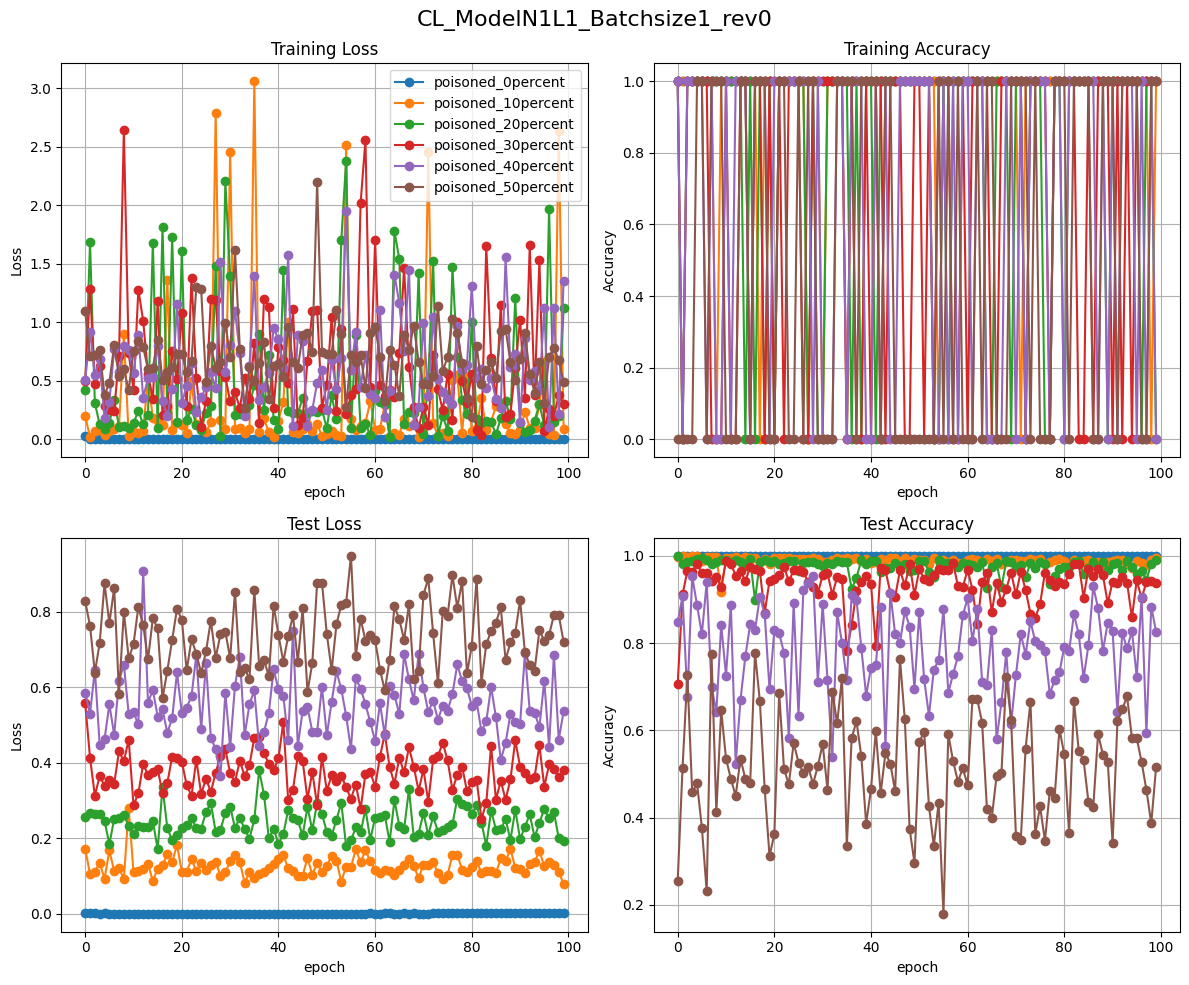

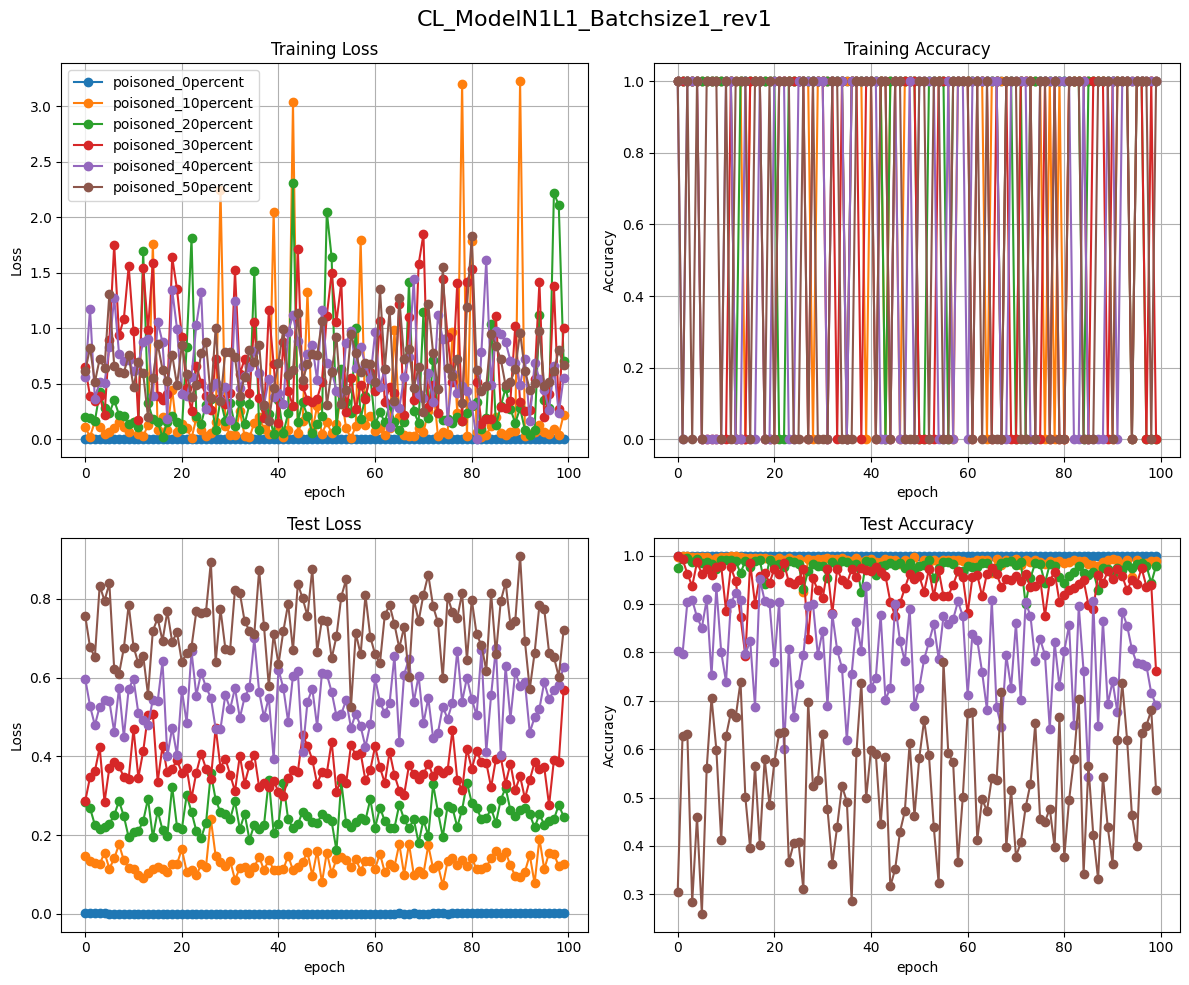

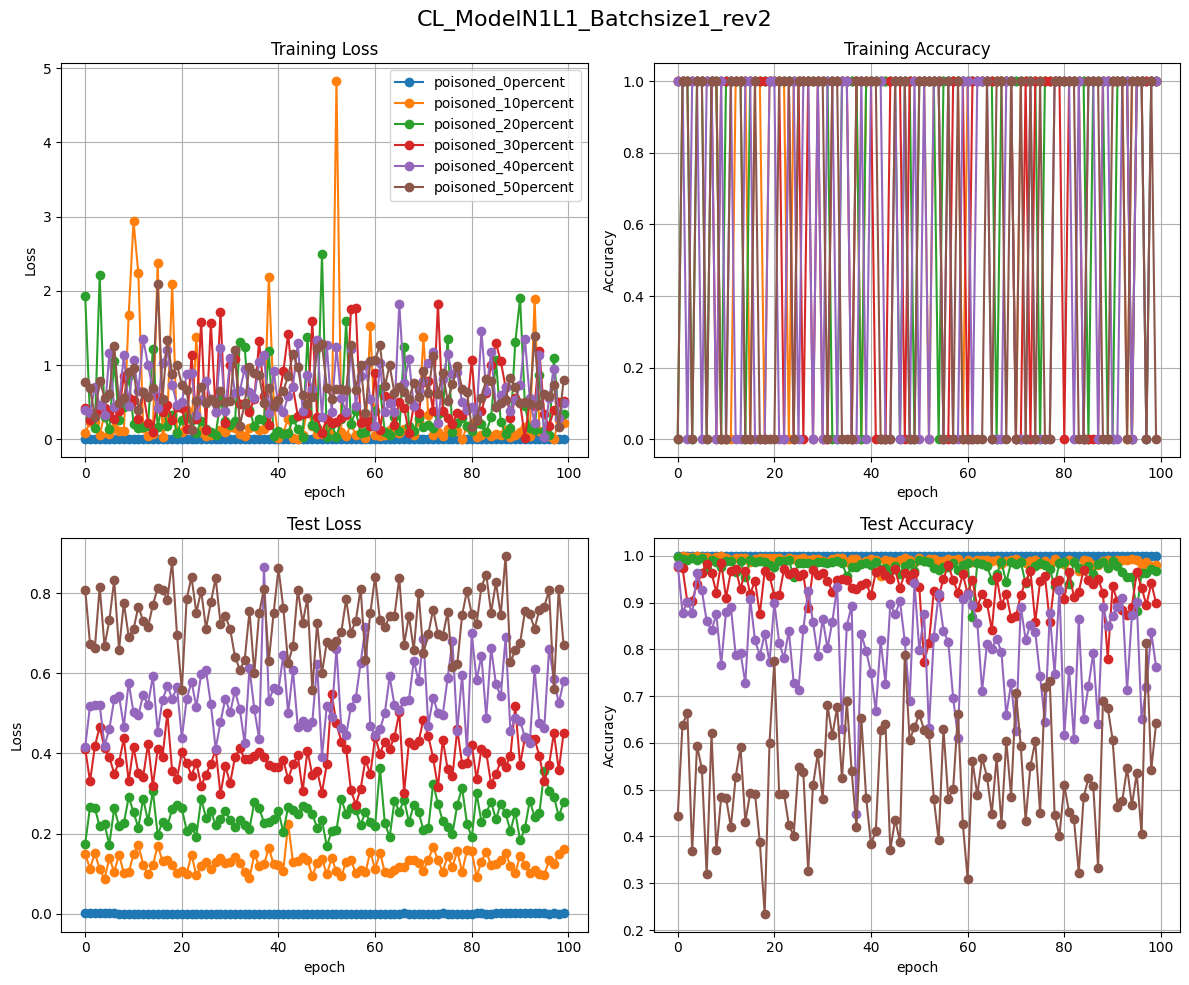

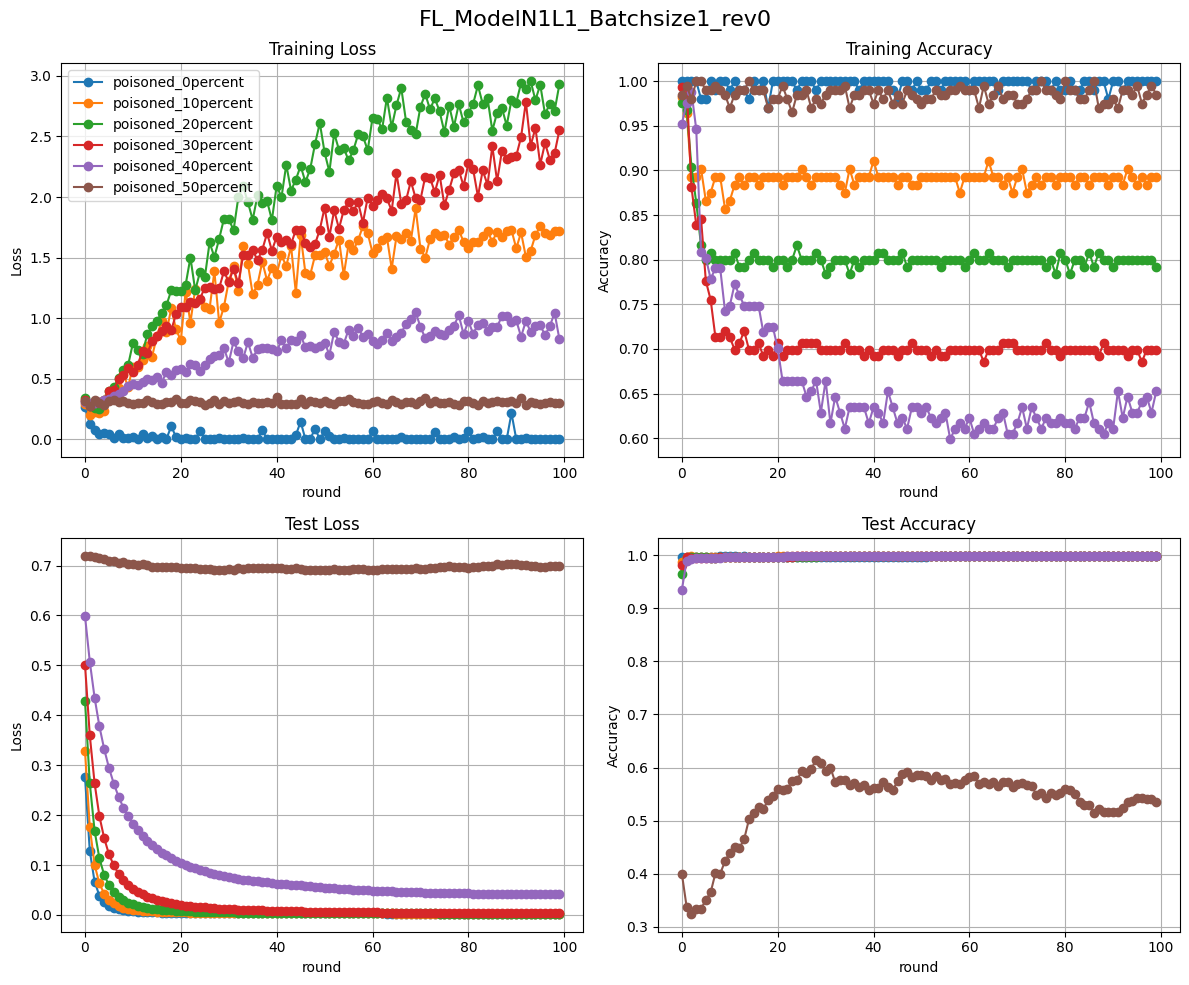

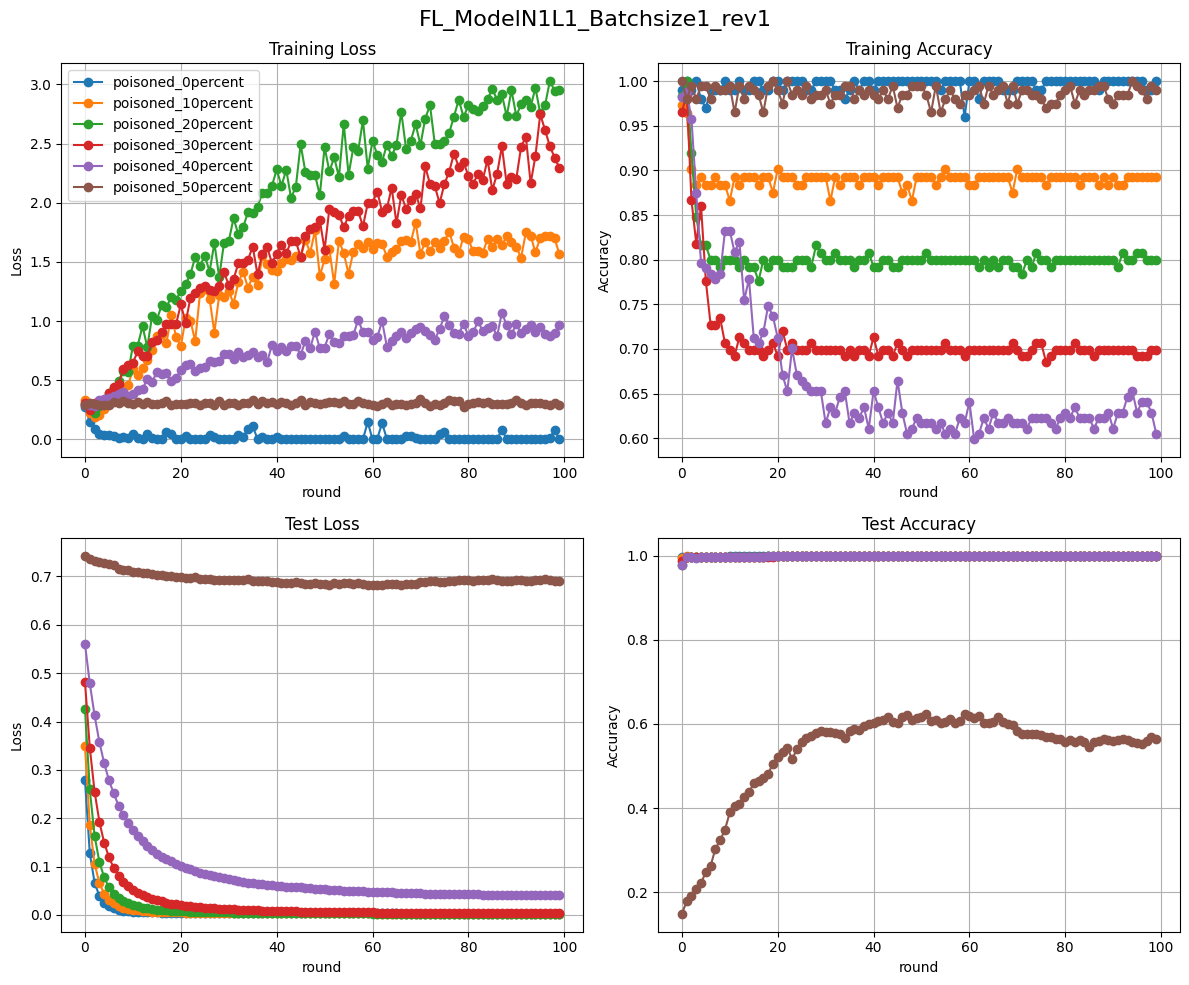

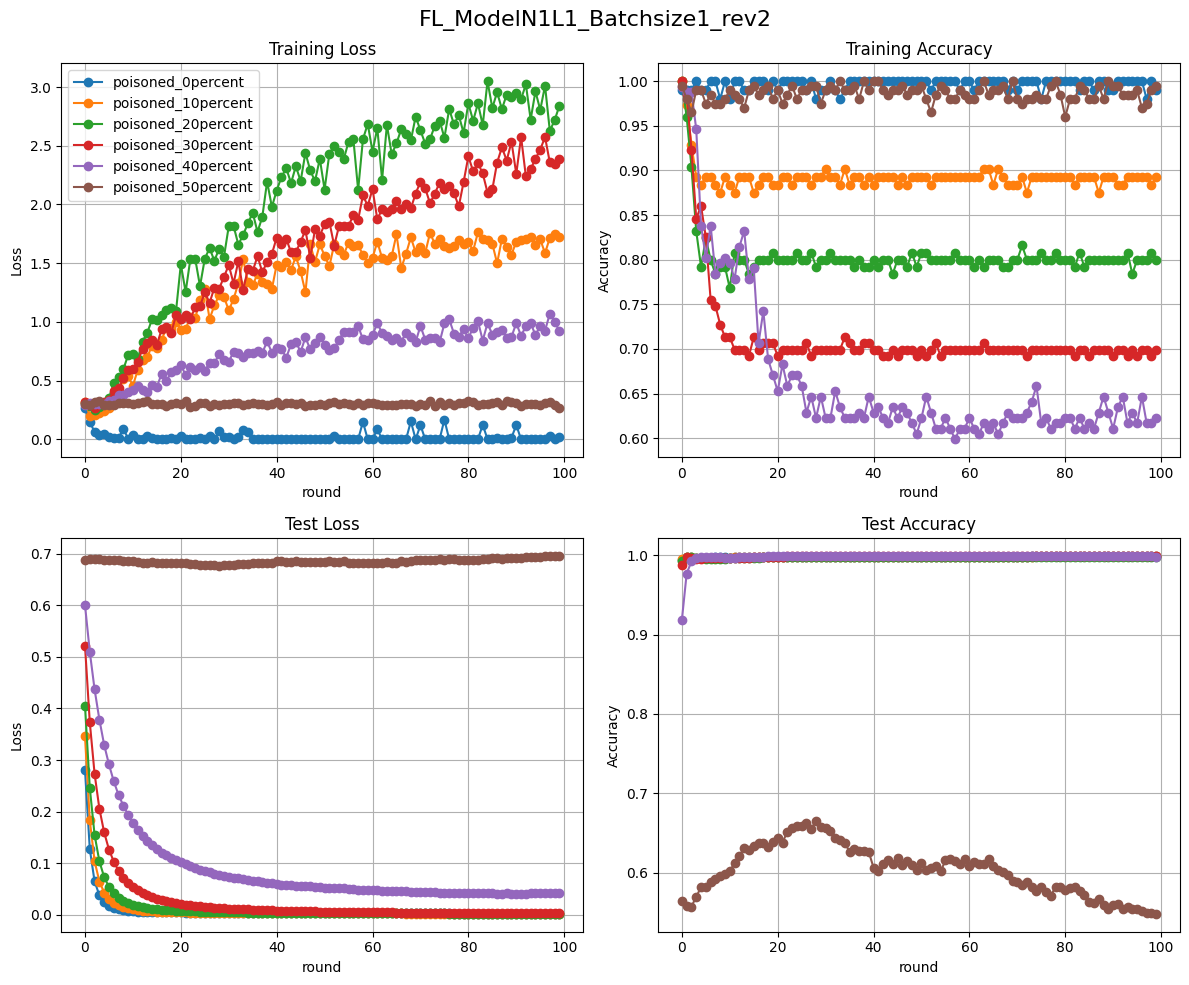

Done!


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

exp_name_list = df_exp['EXPERIMENT'].unique()
# Loop through each CSV file
for i_exp in exp_name_list:

        df_filter = df_exp[df_exp['EXPERIMENT']==i_exp]
               
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f"{i_exp}", fontsize=16)

        for idx,row in df_filter.iterrows():
                
            csv_file = row['CSV']
            sub_f_name = row['SUB_FLODER']

            # Read CSV into DataFrame
            df = pd.read_csv(csv_file)
            
            
            # Check if required columns exist
            ep_rnd = 'epoch'
            if row['APPROACH'] == 'FL':
                 ep_rnd = 'round'
            required_cols = [ep_rnd, 'loss_train', 'acc_train', 'loss_test', 'acc_test']
            if not all(col in df.columns for col in required_cols):
                print(f"Skipping {csv_file}: Missing required columns")
                continue
            
            # Plot loss_train
            axes[0, 0].plot(df[ep_rnd], df['loss_train'], marker='o', label=f'{sub_f_name}')
            # Plot acc_train
            axes[0, 1].plot(df[ep_rnd], df['acc_train'], marker='o', label=f'{sub_f_name}')
            # Plot loss_test
            axes[1, 0].plot(df[ep_rnd], df['loss_test'], marker='o', label=f'{sub_f_name}')
            # Plot acc_test
            axes[1, 1].plot(df[ep_rnd], df['acc_test'], marker='o', label=f'{sub_f_name}')
    
        axes[0, 0].set_title('Training Loss')
        axes[0, 0].set_xlabel(ep_rnd)
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].grid(True)
        axes[0, 0].legend()

        axes[0, 1].set_title('Training Accuracy')
        axes[0, 1].set_xlabel(ep_rnd)
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].grid(True)
        
        axes[1, 0].set_title('Test Loss')
        axes[1, 0].set_xlabel(ep_rnd)
        axes[1, 0].set_ylabel('Loss')
        axes[1, 0].grid(True)
    
        axes[1, 1].set_title('Test Accuracy')
        axes[1, 1].set_xlabel(ep_rnd)
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].grid(True)

        plt.tight_layout()
        
        # Save figure
        # output_name = csv_file.replace('.csv', '_plot.png')
        # plt.savefig(output_name, dpi=300, bbox_inches='tight')
        # print(f"✓ Plotted: {csv_file} -> {output_name}")
        
        plt.show()

print("Done!")